In [1]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [3]:
model_vars_data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\model_vars_data_n.csv',index_col=0)

test_vars_data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\test_vars_data_n.csv',index_col=0)

price_train = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\ny_train.csv',index_col=0)

price_test = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\ny_test.csv',index_col=0)

In [4]:
# Fucntion returns dictionary

def regx3(
model=  None,
x_train = None,
x_test = None,
y_train = None,
y_test =  None,
params = None,
cv_ = 5,
linear_reg = True,
tree_based = False):
######################################
#########################################

    features = list(x_train.columns)

    ss = StandardScaler()
    x_train = pd.DataFrame(ss.fit_transform(x_train), columns = features)
    x_test = pd.DataFrame(ss.fit_transform(x_test), columns = features)

    #     print('train ',x_train.head())
    #     print(' ')
    #     print('test ', x_test.head())


    gs = GridSearchCV(model, params, cv=cv_, return_train_score=True, refit=True)
    gs.fit(x_train,y_train)
    gs.best_params_

    reg_dict = {}
    model= gs.best_estimator_
    reg_dict['mod'] = model
    ###################################    

    print('best params: ',gs.best_params_)
    reg_dict['best params'] = gs.best_params_

    print('score: ',gs.score(x_train,y_train))
    reg_dict['score'] = gs.score(x_train,y_train)

    print('  ')
    print('test score: ',gs.score(x_test,y_test))
    reg_dict['test score'] = gs.score(x_test,y_test)

    if linear_reg:
        adj_r2 = 1-(1-gs.score(x_train,y_train))*(x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1)
        print('adj_r2: ', adj_r2)
        reg_dict['adj_r2'] = adj_r2

        adj_r2_test = 1-(1-gs.score(x_test,y_test))*(x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1)
        print('  ')
        print('adj_r2_test: ',adj_r2_test)
        reg_dict['adj_r2_test'] = adj_r2_test

        print(' ')

    train_pred = gs.best_estimator_.predict(x_train)
    print('train RMSE: ' + str(mean_squared_error(train_pred,y_train)**0.5))
    print('  ')
    reg_dict['train RMSE'] = mean_squared_error(train_pred,y_train)**0.5

    test_pred = gs.best_estimator_.predict(x_test)
    print('test RMSE: ' + str(mean_squared_error(test_pred,y_test)**0.5))
    ###
    reg_dict['test RMSE'] = mean_squared_error(test_pred,y_test)**0.5

    if linear_reg:

        coefs = pd.Series(gs.best_estimator_.coef_, name = 'coef' )

        varnames = pd.Series(features, name = 'features')

        pd.set_option('display.max_rows', None) # or 1000.

        abs_coefs = pd.Series(np.abs(coefs),name = 'abs_val')

        coefs_ = pd.concat([varnames,coefs, abs_coefs], axis=1)

        #return:
        model_importances = coefs_.sort_values(by=['abs_val'], ascending=False)
        model_importances.index=(range(model_importances.shape[0]))
        model_importances
        reg_dict['model_importances'] = model_importances

        print(model_importances)
        print(' ')

    elif tree_based:
        pd.set_option('display.max_rows', None) # or 1000.

        #return
        varnames = pd.Series(features, name = 'features')

        importances_ = pd.Series(model.feature_importances_, name = 'importances')

        df = pd.concat([varnames,importances_], axis=1)

        model_importances = df.sort_values(by=['importances'], ascending=False)

        model_importances.index=(range(model_importances.shape[0]))

        reg_dict['model_importances'] = model_importances



    #         model_importances = pd.Series(model.feature_importances_, index = features).sort_values(ascending=False)

        print(model_importances)


    if linear_reg:
        residuals = y_train - train_pred
        print('skewness: ',stats.skew(residuals))
        print(' ')
        sns.set_theme(style='darkgrid')
        sns.histplot(residuals, bins=20);

    print('model_importances.shape: ',model_importances.shape)
    
    return reg_dict


In [5]:
def to_keep(mod, amt):
    mod = mod['model_importances']
    keeps1 = mod.loc[mod['abs_val'] > amt,['features']]
    list_keeps1 = list(keeps1.features)
    return list_keeps1


In [6]:
# MoSold

# start_list = set(model_vars_data.columns)- set(['MoSold'])

best params:  {'alpha': 100, 'tol': 0.02}
score:  0.951209291484973
  
test score:  0.9255025424781022
adj_r2:  0.9446955923189491
  
adj_r2_test:  0.8972634340311734
 
train RMSE: 0.08337677622995032
  
test RMSE: 0.10172461611241271
                                              features      coef   abs_val
0                                         bc_GrLivArea  0.061237  0.061237
1                                          OverallQual  0.058153  0.058153
2                                      log_first_FlrSF  0.041897  0.041897
3                                          OverallCond  0.041150  0.041150
4                                             2ndFlrSF  0.038169  0.038169
5                                           house_age_ -0.032517  0.032517
6                                      yeo_TotalBsmtSF  0.030815  0.030815
7                                           BsmtFinSF1  0.030783  0.030783
8                                           bc_LotArea  0.026334  0.026334
9         Neigh

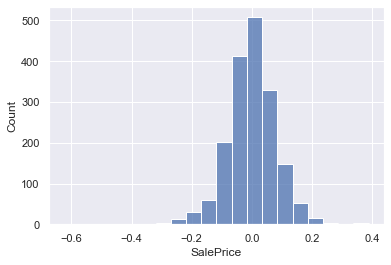

In [7]:
ridge1 = regx3(model= Ridge(max_iter=40000), #max_iter=10000000000000
x_train = model_vars_data,
x_test = test_vars_data,
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,100],'tol':[0.02]},
cv_ = 5,
linear_reg = True,
tree_based = False)

<AxesSubplot:ylabel='Density'>

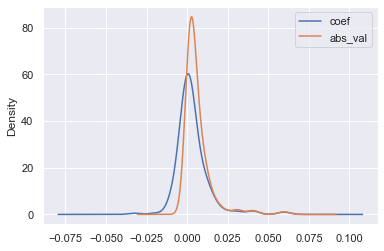

In [8]:
ridge1['model_importances'].plot.kde()

most of the features are between abs value 0.00 and 0.025 because after that the curve flattens out

chose 0.02 for below because that's where the graph begins to flatten out

<AxesSubplot:ylabel='Density'>

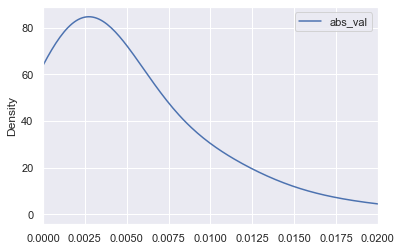

In [9]:
ridge1['model_importances'].plot.kde(y='abs_val',xlim=[0.0,0.02]) #less than 0.003 

look at features less than 0.0025 see what they are and then potentially eliminate them. use 0.0025 because 0.0025 thar is where the graph turns.  look at the left side.

In [10]:
# ridge1['model_importances'].plot.hist(y='abs_val', xlim=[0.0,0.02],bins=50)

In [11]:
keep_feat = to_keep(ridge1, 0.0025)
feat_dropped = set(model_vars_data.columns) - set(keep_feat)
# feat_dropped

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.98891e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.77469e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.78442e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


best params:  {'alpha': 100, 'tol': 0.02}
score:  0.19426540776929202
  
test score:  0.1962599576164975
adj_r2:  0.1329965130070293
  
adj_r2_test:  0.03752759814890927
 
train RMSE: 0.33882273313653893
  
test RMSE: 0.33412820431321366
                                              features      coef   abs_val
0                                          OverallQual  0.002726  0.002726
1                                         bc_GrLivArea  0.002480  0.002480
2                                            ExterQual  0.002266  0.002266
3                                           GarageCars  0.002215  0.002215
4                                          KitchenQual  0.002197  0.002197
5                                       yeo_GarageArea  0.002158  0.002158
6                                      log_first_FlrSF  0.002153  0.002153
7                                      yeo_TotalBsmtSF  0.002151  0.002151
8                                             BsmtQual  0.002045  0.002045
9           

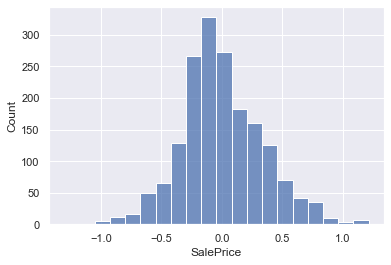

In [12]:
ridge2 = regx3(model= Ridge(max_iter=40000,normalize=True), #max_iter=10000000000000
x_train = model_vars_data[keep_feat],
x_test = test_vars_data[keep_feat],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,100],'tol':[0.02]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [13]:
dummy_drops = ['has_pool',
 'has_miscfeature',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSZoning_RH',
 'LandContour_HLS',
 'LandContour_Low',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_SawyerW',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_SFoyer',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_PreCast',
 'Exterior1st_Stucco',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_ImStucc',
 'Exterior2nd_PreCast',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Shng',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'GarageType_Basment',
 'GarageType_CarPort',
 'PavedDrive_P',
 'Fence_GdWo',
 'Fence_MnWw',
 'MoSold_11',
 'MoSold_12',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Partial']

keep_feat_s = set(model_vars_data.columns) - set(dummy_drops)
keeps = list(keep_feat_s)

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.47856e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.34124e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.42675e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.40499e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matr

best params:  {'alpha': 0.01, 'tol': 0.02}
score:  0.9443381827497959
  
test score:  0.9274005768395697
adj_r2:  0.9400694322722741
  
adj_r2_test:  0.9129262805422782
 
train RMSE: 0.08905436827681207
  
test RMSE: 0.10042039353480098
                                              features      coef   abs_val
0                                         bc_GrLivArea  0.076691  0.076691
1                                          OverallQual  0.062139  0.062139
2                                           house_age_ -0.052100  0.052100
3                                          OverallCond  0.049813  0.049813
4                                             2ndFlrSF  0.049707  0.049707
5                                           bc_LotArea  0.041810  0.041810
6                                           BsmtFinSF1  0.039889  0.039889
7                                      log_first_FlrSF  0.037089  0.037089
8         Neighborhood_NoRidge_NridgHt_Veenker_StoneBr  0.029200  0.029200
9            

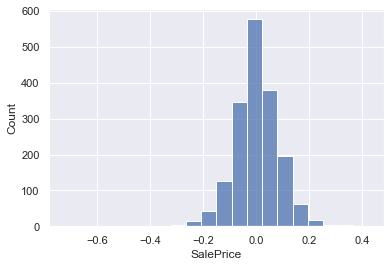

In [14]:
ridge3 = regx3(model= Ridge(max_iter=40000,normalize=True), #max_iter=10000000000000
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,100],'tol':[0.02]},
cv_ = 5,
linear_reg = True,
tree_based = False)

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.67964e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.79448e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.63256e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


best params:  {'alpha': 10}
score:  0.9523160951056124
  
test score:  0.9251959858001176
adj_r2:  0.9486901614805715
  
adj_r2_test:  0.9104227792339967
 
train RMSE: 0.082425661884664
  
test RMSE: 0.10193369939112364
                                              features      coef   abs_val
0                                         bc_GrLivArea  0.074069  0.074069
1                                          OverallQual  0.062106  0.062106
2                                           house_age_ -0.054140  0.054140
3                                             2ndFlrSF  0.051209  0.051209
4                                          OverallCond  0.047023  0.047023
5                                           bc_LotArea  0.044647  0.044647
6                                           BsmtFinSF1  0.044121  0.044121
7                                      log_first_FlrSF  0.040529  0.040529
8                                          MSZoning_RM -0.029569  0.029569
9                             

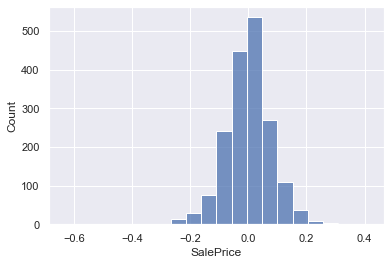

In [15]:
ridge2 = regx3(model= Ridge(max_iter=40000), #max_iter=10000000000000
x_train = model_vars_data[keep_feat],
x_test = test_vars_data[keep_feat],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,100,150,200,250,300,350,400,450,500]},
cv_ = 5,
linear_reg = True,
tree_based = False)